Tornado Data

In [ ]:
#Import libraries and data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
%matplotlib inline

In [ ]:
#Data Source: https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021

In [9]:
path="/content/drive/MyDrive/Data Analysis Certificate Laguardia/Python/Capstone/Python/Capstone/Dataset/us_tornado_dataset_1950_2021.csv"
df=pd.read_csv(path)

In [ ]:
#Explore the data

In [10]:
df.describe() #Averages of interest: inj, fat, len, wid

,yr,mo,dy,mag,inj,fat,slat,slon,elat,elon,len,wid
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,1991.341618,5.976761,15.921016,0.691273,1.437876,0.090470,37.142412,-92.784618,22.730695,-56.245590,3.478340,106.577030
std,19.330015,2.438192,8.736773,1.283375,18.263956,1.484106,5.093979,8.689103,18.588638,45.489157,8.278775,205.802676
min,1950.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000
25%,1976.000000,4.000000,8.000000,0.000000,0.000000,0.000000,33.220000,-98.450000,0.000000,-94.709800,0.100000,20.000000
50%,1994.000000,6.000000,16.000000,1.000000,0.000000,0.000000,37.030000,-93.600000,32.480000,-84.420000,0.800000,50.000000
75%,2008.000000,7.000000,24.000000,1.000000,0.000000,0.000000,40.930000,-86.730000,38.610000,0.000000,3.130000,100.000000
max,2021.000000,12.000000,31.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,61.020000,0.000000,234.700000,4576.000000


In [11]:
df.shape

(67558, 14)

In [12]:
df.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [13]:
#Rename columns of interest
df.rename(columns={'yr': 'Year', 'mo': 'Month', 'dy': 'Day', 'date': 'Date', 'st': 'State',
                   'mag': 'Magnitude', 'inj': 'Injuries', 'fat': 'Fatalities', 'len': 'Track', 'wid': "Width"}, inplace=True)
df.head()

,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,slat,slon,elat,elon,Track,Width
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [14]:
#Create a smaller dataframe with columns of interest
df2=df[['Year', 'Month', 'Date', 'State', 'Magnitude', 'Injuries', 'Fatalities', 'Track', 'Width']]
df2.head()

,Year,Month,Date,State,Magnitude,Injuries,Fatalities,Track,Width
0,1950,1,1950-01-03,IL,3,3,0,3.6,130
1,1950,1,1950-01-03,MO,3,3,0,9.5,150
2,1950,1,1950-01-03,OH,1,1,0,0.1,10
3,1950,1,1950-01-13,AR,3,1,1,0.6,17
4,1950,1,1950-01-25,IL,2,0,0,0.1,100


In [15]:
df2['Year'].nunique() #How many years of data? 72

72

In [16]:
df2['Year'].describe() #Year range 1950-2021

count    67558.000000
mean      1991.341618
std         19.330015
min       1950.000000
25%       1976.000000
50%       1994.000000
75%       2008.000000
max       2021.000000
Name: Year, dtype: float64

In [17]:
df2.isnull().sum() #No null values

Year          0
Month         0
Date          0
State         0
Magnitude     0
Injuries      0
Fatalities    0
Track         0
Width         0
dtype: int64

In [18]:
df2['State'].nunique() #53 states/locations?

53

In [19]:
df2['State'].value_counts() #50 states plus DC, Puerto Rico and the Virgin Islands

TX    9149
KS    4375
OK    4092
FL    3497
NE    2967
IA    2773
IL    2682
MS    2476
MO    2427
AL    2358
CO    2306
LA    2222
MN    2023
AR    1912
SD    1861
GA    1801
ND    1617
IN    1543
WI    1467
NC    1431
TN    1331
OH    1196
SC    1116
MI    1071
KY    1067
PA     902
VA     787
WY     711
NM     634
NY     476
CA     462
MT     431
MD     389
AZ     270
ID     218
MA     178
NJ     170
WV     143
UT     134
ME     134
WA     125
OR     121
CT     120
NH      94
NV      94
DE      69
VT      46
HI      41
PR      28
RI      13
AK       4
DC       3
VI       1
Name: State, dtype: int64

In [20]:
df2['Magnitude'].value_counts() #-9 = unknown magnitude

 0    31375
 1    22885
 2     9517
 3     2536
-9      605
 4      581
 5       59
Name: Magnitude, dtype: int64

In [21]:
#Drop rows with unknown magnitudes
df2 = df2[df2['Magnitude'] != -9]
df2['Magnitude'].value_counts()

0    31375
1    22885
2     9517
3     2536
4      581
5       59
Name: Magnitude, dtype: int64

In [22]:
df2.shape

(66953, 9)

In [23]:
df2.columns

Index(['Year', 'Month', 'Date', 'State', 'Magnitude', 'Injuries', 'Fatalities',
       'Track', 'Width'],
      dtype='object')

The Enhance Fujita Scale
* Rating - Wind Speed -	Damage - Strength
* EF0 - 65–85 mph -	Light damage - Weak
* EF1 - 86–110 mph - Moderate damage - Weak
* EF2 - 111–135 mph - Considerable damage - Strong
* EF3 - 136–165 mph - Severe damage - Strong
* EF4 - 166–200 mph - Devastating damage- Violent
* EF5 - >200 mph - Incredible damage - Violent

In [24]:
#adding column for Damage
df2['Damage'] = df2['Magnitude']
df2.head()

,Year,Month,Date,State,Magnitude,Injuries,Fatalities,Track,Width,Damage
0,1950,1,1950-01-03,IL,3,3,0,3.6,130,3
1,1950,1,1950-01-03,MO,3,3,0,9.5,150,3
2,1950,1,1950-01-03,OH,1,1,0,0.1,10,1
3,1950,1,1950-01-13,AR,3,1,1,0.6,17,3
4,1950,1,1950-01-25,IL,2,0,0,0.1,100,2


In [25]:
#Renaming Damage values
df2['Damage'].replace([0, 1, 2, 3, 4, 5], ["Light Damage", "Moderate Damage", "Considerable Damage", "Severe Damage",
                                               "Devastating Damage", "Incredible Damage"], inplace= True)
df2['Damage'].value_counts()

Light Damage           31375
Moderate Damage        22885
Considerable Damage     9517
Severe Damage           2536
Devastating Damage       581
Incredible Damage         59
Name: Damage, dtype: int64

In [26]:
#adding Strength
df2['Strength'] = df2['Magnitude']
df2.head()

,Year,Month,Date,State,Magnitude,Injuries,Fatalities,Track,Width,Damage,Strength
0,1950,1,1950-01-03,IL,3,3,0,3.6,130,Severe Damage,3
1,1950,1,1950-01-03,MO,3,3,0,9.5,150,Severe Damage,3
2,1950,1,1950-01-03,OH,1,1,0,0.1,10,Moderate Damage,1
3,1950,1,1950-01-13,AR,3,1,1,0.6,17,Severe Damage,3
4,1950,1,1950-01-25,IL,2,0,0,0.1,100,Considerable Damage,2


In [27]:
#Renaming Damage values
df2['Strength'].replace([0, 1, 2, 3, 4, 5], ["Weak", "Weak", "Strong", "Strong", "Violent", "Violent"],
                        inplace= True)
df2['Strength'].value_counts()

Weak       54260
Strong     12053
Violent      640
Name: Strength, dtype: int64

In [28]:
df2.head()

,Year,Month,Date,State,Magnitude,Injuries,Fatalities,Track,Width,Damage,Strength
0,1950,1,1950-01-03,IL,3,3,0,3.6,130,Severe Damage,Strong
1,1950,1,1950-01-03,MO,3,3,0,9.5,150,Severe Damage,Strong
2,1950,1,1950-01-03,OH,1,1,0,0.1,10,Moderate Damage,Weak
3,1950,1,1950-01-13,AR,3,1,1,0.6,17,Severe Damage,Strong
4,1950,1,1950-01-25,IL,2,0,0,0.1,100,Considerable Damage,Strong


In [ ]:
#frequencies of magnitudes, injuries, and fatalities

Text(0, 0.5, 'Count')

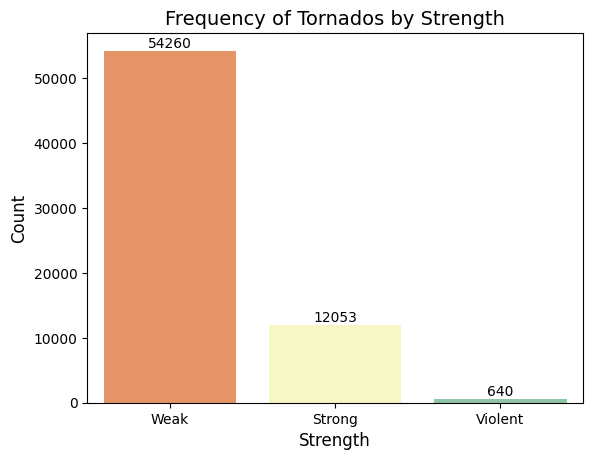

In [29]:
#Frequency of tornados by strength 1950-2021
ax = sns.countplot(x=df2['Strength'],
                   order=df2['Strength'].value_counts(ascending=False).index,
                   palette="Spectral"); #palette options: pastel, Spectral, flare. color options: color='orange'

abs_values = df2['Strength'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Frequency of Tornados by Strength', size = 14)
ax.set_xlabel('Strength', size = 12)
ax.set_ylabel('Count', size = 12)

 #Tornados from 1950-2021 were majority weak with winds 65-110 mph. 54,260 weak tornados of the 66,953 tornadoes with known magnitude.

Text(0, 0.5, 'Count')

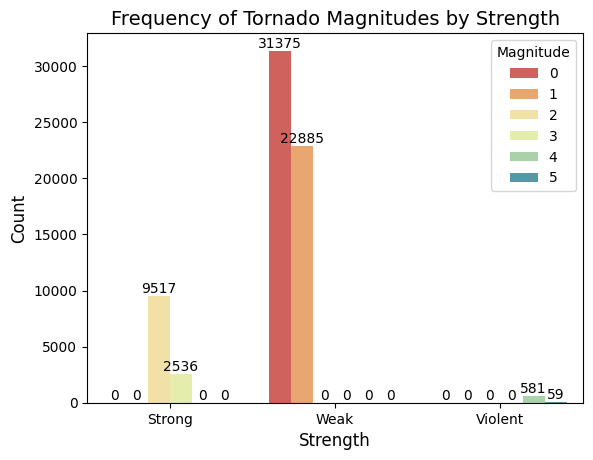

In [30]:
#frequency table of magnitude by strength
magplot = sns.countplot(data=df2, x="Strength", hue="Magnitude", palette="Spectral")
for label in magplot.containers:
    magplot.bar_label(label)

magplot.set_title('Frequency of Tornado Magnitudes by Strength', size = 14)
magplot.set_xlabel('Strength', size = 12)
magplot.set_ylabel('Count', size = 12)

#Here we see the magnitudes that make up each strength category. There's a drop in the frequency of magnitude 3, 4 and 5 tornados.

Text(0, 0.5, 'Count')

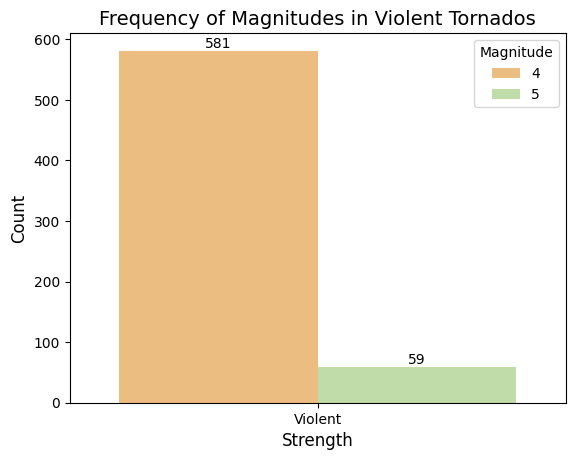

In [31]:
#Zoomed in on violent strength
violent = df2[df2['Strength'] == "Violent"]
vplot = sns.countplot(data=violent, x="Strength", hue="Magnitude", palette="Spectral")
for label in vplot.containers:
    vplot.bar_label(label)

vplot.set_title('Frequency of Magnitudes in Violent Tornados', size = 14)
vplot.set_xlabel('Strength', size = 12)
vplot.set_ylabel('Count', size = 12)

#Table shows only 59 of the 640 violent tornados are magnitude 5. Magnitude 5 makes up only 1% of all tornados between 1950 - 2021.

In [32]:
(31375/54260)*100 #57.8% of Weak tornados are magnitude 0

57.823442683376335

In [ ]:
(59/640)*100 #9.2% of violent tornados were a magnitude of 5

9.21875

In [ ]:
(581/640)*100 #90.8% of violent tornados were a magnitude of 4

90.78125

In [33]:
#Frequency table Strength by Magnitude
freq_table = pd.crosstab(index=df2['Magnitude'], columns=df2['Strength'], margins=True)
freq_table.index=['0', '1', '2', '3', '4', '5', 'coltotal']
freq_table.columns=['Strong', 'Violent', 'Weak', 'rowtotal']
freq_table

,Strong,Violent,Weak,rowtotal
0,0,0,31375,31375
1,0,0,22885,22885
2,9517,0,0,9517
3,2536,0,0,2536
4,0,581,0,581
5,0,59,0,59
coltotal,12053,640,54260,66953


In [34]:
#Frequency table Strength by Magnitude - Proportions
sm = (freq_table/freq_table.loc['coltotal', 'rowtotal'])*100
sm
#81% of tornados were Weak with 46.86% of those being a magnitude of 0.
#Only 1% of tornados are considered Violent with only 0.09% of tornados a magnitude of 5.

,Strong,Violent,Weak,rowtotal
0,0.000000,0.000000,46.861231,46.861231
1,0.000000,0.000000,34.180694,34.180694
2,14.214449,0.000000,0.000000,14.214449
3,3.787732,0.000000,0.000000,3.787732
4,0.000000,0.867773,0.000000,0.867773
5,0.000000,0.088122,0.000000,0.088122
coltotal,18.002181,0.955894,81.041925,100.000000


Fatalities

<ipython-input-35-06d9abceba5b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fatal = df2.groupby('Strength').sum().reset_index()


Text(0, 0.5, 'Fatalities')

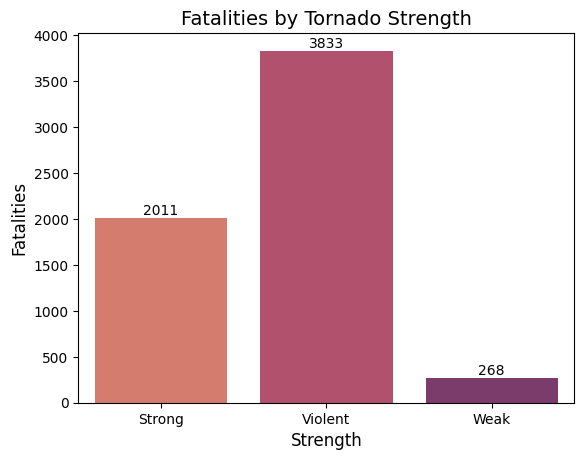

In [35]:
#Fatalities by tornado strength
fatal = df2.groupby('Strength').sum().reset_index()
fatplt = sns.barplot(x='Strength',y= 'Fatalities',
                 data=fatal, palette='flare')

fatplt.bar_label(fatplt.containers[0] )
fatplt.set_title('Fatalities by Tornado Strength', size = 14)
fatplt.set_xlabel('Strength', size = 12)
fatplt.set_ylabel('Fatalities', size = 12)


#Though violent tornados are the smallest proportion of all tornados (1% or 0.96%), they are responsible for the most fatalities ( % of all fatalities)

In [36]:
#Table of Fatalities by Tornado Strength

vf2 = df2.groupby('Strength').sum().reset_index()
vf2.head()

<ipython-input-36-710f2001bcab>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vf2 = df2.groupby('Strength').sum().reset_index()


,Strength,Year,Month,Magnitude,Injuries,Fatalities,Track,Width
0,Strong,23879180,69929,26642,40486,2011,105896.01,2801542
1,Violent,1267053,3294,2619,48616,3833,18569.10,407930
2,Weak,108163053,326999,22885,8038,268,109786.99,3959701


In [37]:
df2['Fatalities'].sum()

6112

In [38]:
(3833/6112)*100 #62.7% of tornado related fatalities are from violent tornados

62.71269633507853

<ipython-input-39-f4461561856b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fatal = violent.groupby('Magnitude').sum().reset_index()


Text(0, 0.5, 'Fatalities')

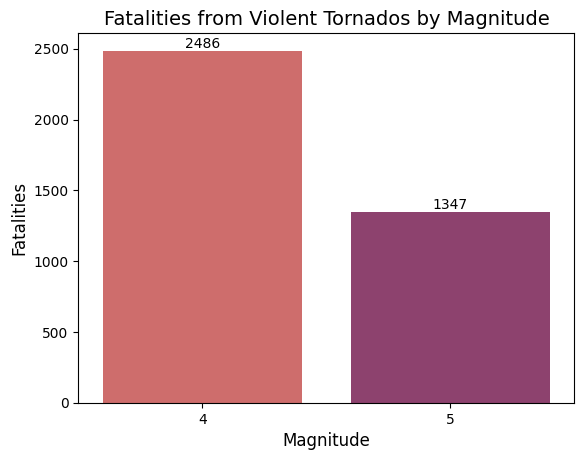

In [39]:
#Frequency of fatalities in Violent tornados by magnitude

violent = df2[df2['Strength'] == "Violent"]
fatal = violent.groupby('Magnitude').sum().reset_index()

fatplt = sns.barplot(x='Magnitude',y= 'Fatalities',
                 data=fatal, palette='flare')

fatplt.bar_label(fatplt.containers[0] )
fatplt.set_title('Fatalities from Violent Tornados by Magnitude', size = 14)
fatplt.set_xlabel('Magnitude', size = 12)
fatplt.set_ylabel('Fatalities', size = 12)

#Out of the 3833 fatalities from violent tornados, 1347 are due to magnitude 5 tornados. magnitude 4 tornados have resulted in the most casualties.

In [40]:
#Table of Fatalities from Tornados by Magnitude

vf = df2.groupby(['Strength', 'Magnitude']).sum().reset_index()
vf.head(10)

<ipython-input-40-b01941fa479e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vf = df2.groupby(['Strength', 'Magnitude']).sum().reset_index()


,Strength,Magnitude,Year,Month,Injuries,Fatalities,Track,Width
0,Strong,2,18854446,55654,16253,626,67554.91,1830242
1,Strong,3,5024734,14275,24233,1385,38341.10,971300
2,Violent,4,1150347,2997,35660,2486,16267.64,358425
3,Violent,5,116706,297,12956,1347,2301.46,49505
4,Weak,0,62636843,190245,856,25,34289.09,1422866
5,Weak,1,45526210,136754,7182,243,75497.90,2536835


In [41]:
(2486/3833)*100 #65% of tornado related fatalities are due to magnitude 4 tornados

64.85781372293243

In [ ]:
(1347/3833)*100 #35% of tornado-related fatalities are due to magnitude 5 tornados

35.14218627706757

Injuries

<ipython-input-42-f41793b37ed2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  injury = df2.groupby('Strength').sum().reset_index()


Text(0, 0.5, 'Injuries')

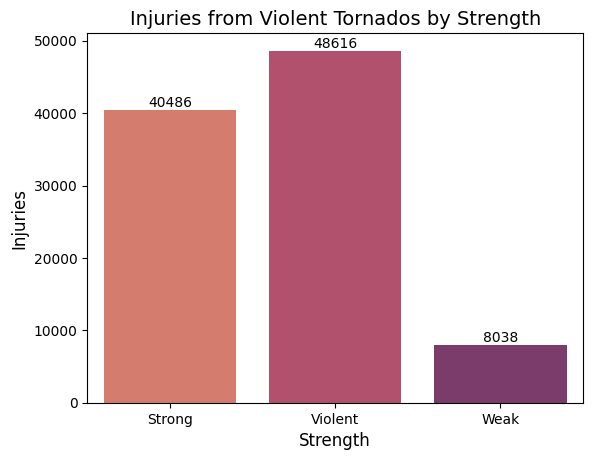

In [42]:
#Injuries by tornado strength
injury = df2.groupby('Strength').sum().reset_index()
injplot = sns.barplot(x='Strength',y= 'Injuries',
                 data=injury, errwidth=0, palette='flare')
injplot.bar_label(injplot.containers[0])


injplot.set_title('Injuries from Violent Tornados by Strength', size = 14)
injplot.set_xlabel('Strength', size = 12)
injplot.set_ylabel('Injuries', size = 12)

#Violent tornados also account for the most injuries at 48,616 though strong tornados are not far behind with 40,486.

In [43]:
df2['Injuries'].sum()

97140

In [ ]:
(48616/97140)*100 #about 50% of injuries occur from violent tornados.

50.047354333951

In [44]:
df2.groupby(['Strength'])['Injuries'].sum()

Strength
Strong     40486
Violent    48616
Weak        8038
Name: Injuries, dtype: int64

<ipython-input-45-07c1f84d7fc1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  injury = df2.groupby('Magnitude').sum().reset_index()


Text(0, 0.5, 'Injuries')

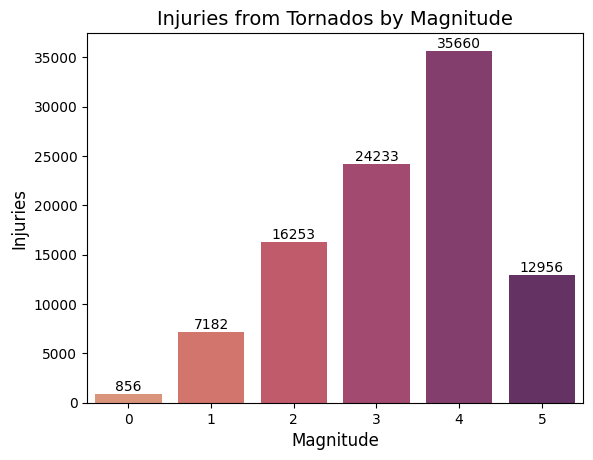

In [45]:
#Injuries by tornado magnitude
injury = df2.groupby('Magnitude').sum().reset_index()
injplot = sns.barplot(x='Magnitude',y= 'Injuries',
                 data=injury, errwidth=0, palette='flare')
injplot.bar_label(injplot.containers[0])


injplot.set_title('Injuries from Tornados by Magnitude', size = 14)
injplot.set_xlabel('Magnitude', size = 12)
injplot.set_ylabel('Injuries', size = 12)

In [ ]:
(35660/97140)*100 #Most injuries occured during magnitude 4 tornados (36.7% of injuries)

36.70990323244801

In [ ]:
(24233/97140)*100 #25% of injuries occurred during magnitude 3 tornados.

24.946469013794523

In [ ]:
(16253/97140)*100 #16% of injuries occurred during magnitude 3 tornados.

16.731521515338688

In [ ]:
(12956/97140)*100 #13% of injuries occurred during a magnitude 5 tornado.

13.337451101502987

In [ ]:
(35660/48616)*100 #73% of injuries during violent tornados happened during magnitude 4.

73.35033733750205

End